# Visualizing Earnings Based on College Majors

This notebooks explores a dataset about the job outcomes of students graduated from college between 2010 and 2012. <br>
The original dataset is by the [American Community Survey](https://www.census.gov/programs-surveys/acs/), but I'm using a cleaned version released by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors) <br>

The main columns are: <br>
<ul>
<li>**Rank** - Rank by median earnings (the dataset is ordered by this column).</li>
<li>**Major** - Major description.</li>
<li>**Major_code** - Major code.</li>
<li>**Major_category** - Category of major.</li>
<li>**Total** - Total number of people with major.</li>
<li>**Sample_size** - Sample size (unweighted) of full-time.</li>
<li>**Men** - Male graduates.</li>
<li>**Women** - Female graduates.</li>
<li>**ShareWomen** - Women as share of total.</li>
<li>**Median** - Median salary of full-time, year-round workers.</li>
<li>**Low_wage_jobs** - Number in low-wage service jobs.</li>
<li>**Full_time** - Number employed 35 hours or more.</li>
<li>**Full_time** - Number employed 35 hours or more.</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")

In [4]:
recent_grads.iloc[[0]]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [5]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [9]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [10]:
# removing rows with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)
print((raw_data_count - cleaned_data_count))

172
1


Only one row contained data with missing values.

## Visualizations

### Income and Number of Students

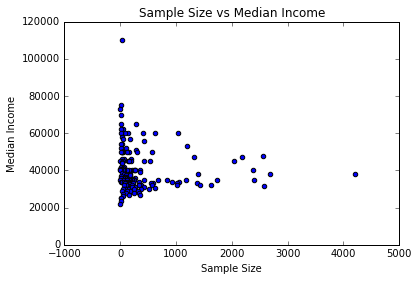

In [11]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind= 'scatter',
                  title ="Sample Size vs Median Income")
ax.set_ylabel("Median Income")
ax.set_xlabel("Sample Size");

Most of samples in the dataset are under 1000 students, as expected considering that the average sample size is 356 students. <br>
Income is very variable for majors with a limited number of students, going from the minimum around 22,000\$ to the maximum in the dataset around 110,000\$, but the majors that offer a higher income seem to be mostly the ones with fewer students.  <br>
The most popular major, with a number of students over 4000,offer a median income that is about the same of the entire dataset, around 40,000\$. <br>
For most of the popular majors, with over 1000 students, only a few offer an income over 50,000\$. <br>


### Unemployment Rate and Number of Students

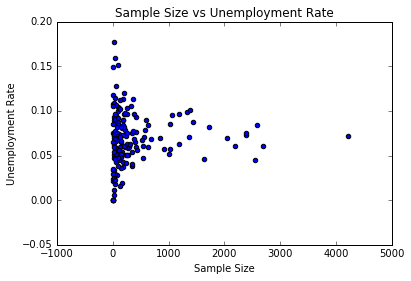

In [12]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                       kind= 'scatter',
                  title ="Sample Size vs Unemployment Rate")
ax.set_ylabel("Unemployment Rate")
ax.set_xlabel("Sample Size");

The mean unemployment rate is about 0.07 (7%). <br>
Both popular and less popular major seem to be distributed at the same way around this value.

### Full Time Work and and Income

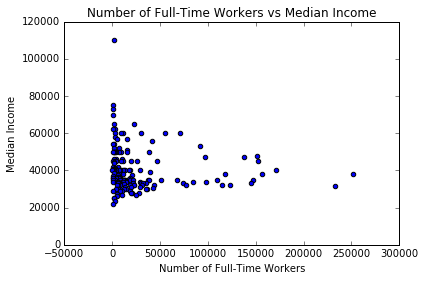

In [13]:
ax = recent_grads.plot(x='Full_time', y='Median',
                       kind= 'scatter',
                  title ="Number of Full-Time Workers vs Median Income")
ax.set_ylabel("Median Income")
ax.set_xlabel("Number of Full-Time Workers");

This plot show the number of full-time workers for every major and the respective median income. The median income for all the dataset is 33,000\$, while the mean is about 40,000\$. <br>
More full-time worker doesn't seem to mean higher income, the correlation between these two variable is quite weak.

### Proportion of Women and Unemployment Rate

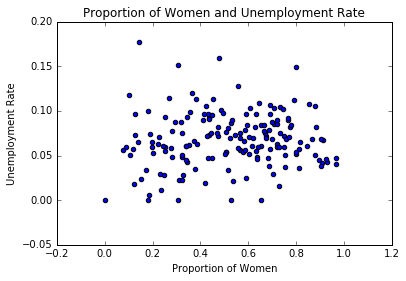

In [14]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                       kind= 'scatter',
                  title ="Proportion of Women and Unemployment Rate")
ax.set_ylabel("Unemployment Rate")
ax.set_xlabel("Proportion of Women");

The proportion of women in majors doesn't seem to be correlated to the unemployment rate.

### Number of Men Graduates and Median Income

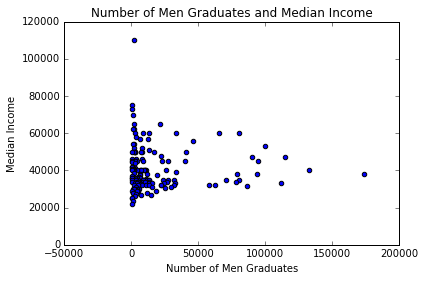

In [15]:
ax = recent_grads.plot(x='Men', y='Median',
                       kind= 'scatter',
                  title ="Number of Men Graduates and Median Income")
ax.set_ylabel("Median Income")
ax.set_xlabel("Number of Men Graduates");

There is no significative correlation between the total number of men graduates and and the median income.

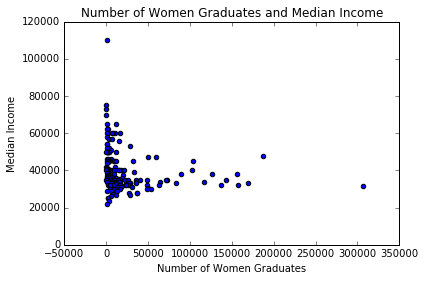

In [16]:
ax = recent_grads.plot(x='Women', y='Median',
                       kind= 'scatter',
                  title ="Number of Women Graduates and Median Income")
ax.set_ylabel("Median Income")
ax.set_xlabel("Number of Women Graduates");

There is a negative weak correlation between the total number of women graduates and the Median Income, but this could be driven by a major with a very high number of women graduates (over 300,000) and an income between the lowest.

### Distribution of the Number of Students

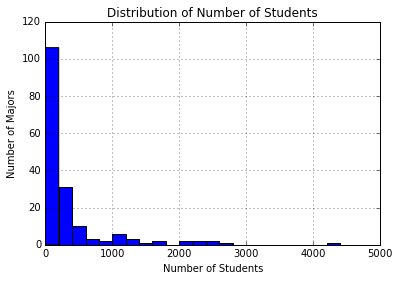

In [26]:
ax = recent_grads['Sample_size'].hist(bins=25, range=(0,5000));
ax.set_title("Distribution of Number of Students")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Number of Students");

As expected from the previous graph, most majors have a number of students under 500, the distribution is strongly skewed to the right.

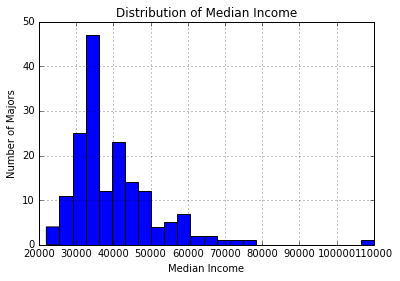

In [41]:
ax = recent_grads['Median'].hist(bins=25);
ax.set_title("Distribution of Median Income")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Median Income");

The mode for the distribution is 35,000\$, only a major seem to have a very high income of 110,000\$.

### Distribution of Number of Employed Graduates

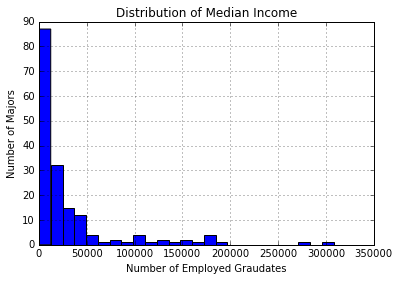

In [43]:
ax = recent_grads['Employed'].hist(bins=25);
ax.set_title("Distribution of Median Income")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Number of Employed Graudates");

Most of Major seem to have a number of employed graduates under 25,000.

### Distribution fo Full-Time Workers

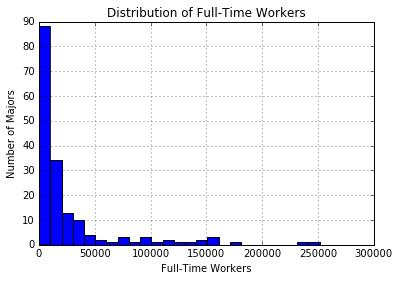

In [52]:
ax = recent_grads['Full_time'].hist(bins=25);
ax.set_title("Distribution of Full-Time Workers")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Full-Time Workers");

The distribution of fulltime workers is similar to the one of the number of employed graduates.

### Distribution of Proportion of Women in Majors

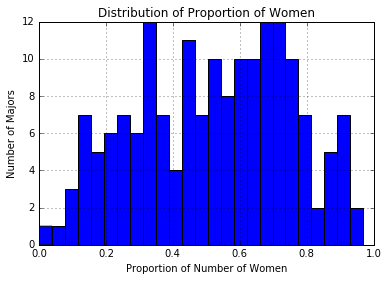

In [53]:
ax = recent_grads['ShareWomen'].hist(bins=25);
ax.set_title("Distribution of Proportion of Women")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Proportion of Number of Women");

The distribution of proportion of women seem to indicate a bidomodal distribution: majors wit a majority of women (with a mode around 75%) and major with a majority of men (with a mode for women presence around 30%)

### Distribution of Unemployment Rate

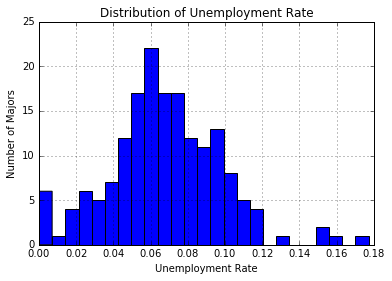

In [54]:
ax = recent_grads['Unemployment_rate'].hist(bins=25);
ax.set_title("Distribution of Unemployment Rate")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Unemployment Rate");

The unemployment rate is slightly skewed to the right, with a mode at 6%

### Distribution of Men Graduates

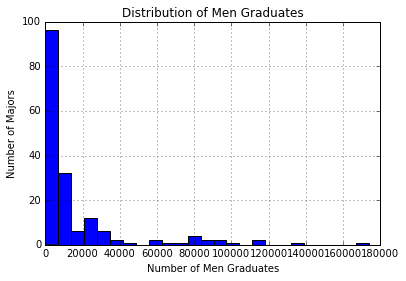

In [55]:
ax = recent_grads['Men'].hist(bins=25);
ax.set_title("Distribution of Men Graduates")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Number of Men Graduates");

### Distribution of Female Graduates

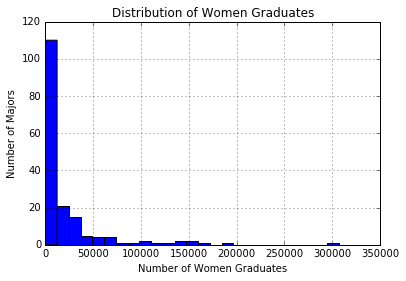

In [56]:
ax = recent_grads['Women'].hist(bins=25);
ax.set_title("Distribution of Women Graduates")
ax.set_ylabel("Number of Majors")
ax.set_xlabel("Number of Women Graduates");

In [57]:
from pandas.plotting import scatter_matrix

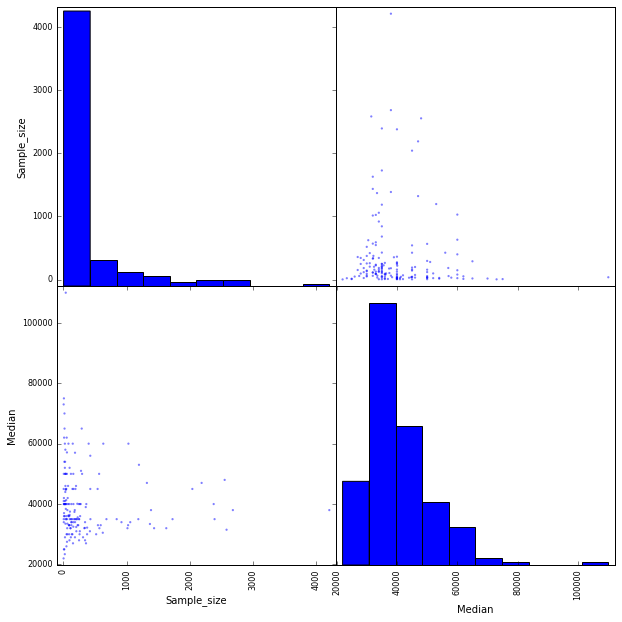

In [59]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10));

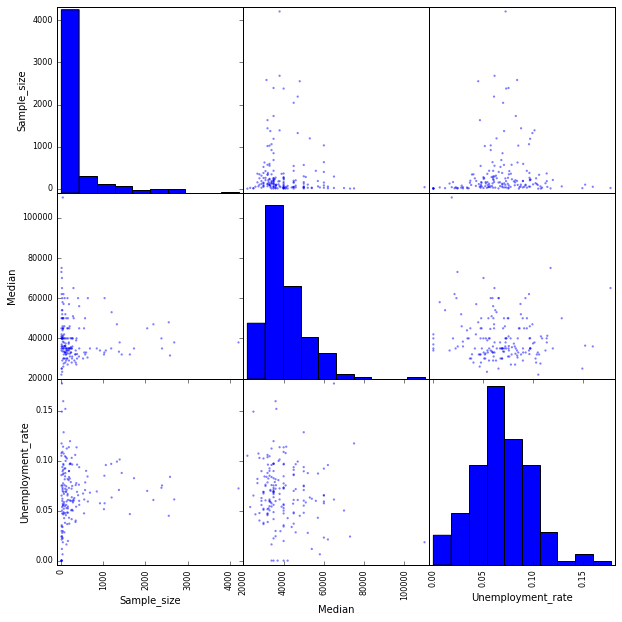

In [61]:
scatter_matrix(recent_grads[['Sample_size', 'Median',
                             'Unemployment_rate']], figsize=(10,10));

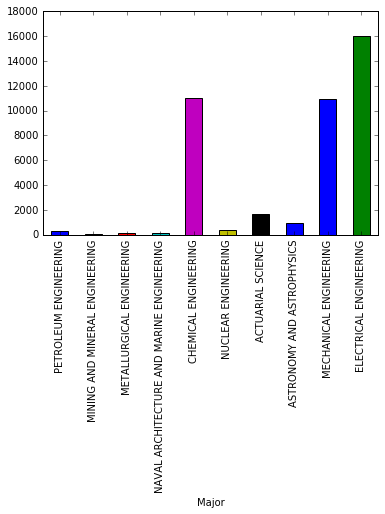

In [68]:
recent_grads[:10].plot.bar(x='Major', y='Women', legend = False);

In [73]:
last_ten = recent_grads.shape[0] - 10
last_ten

162

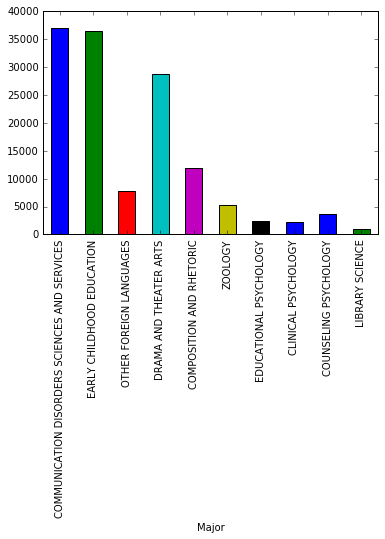

In [74]:
recent_grads[last_ten :].plot.bar(x='Major', y='Women', legend = False);